# Bayesian Updating with Conjugate Priors

## Setup

In [37]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [123]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

In [38]:
np.random.seed(42)
sns.set_style('dark')

## Formatting Helper

In [149]:
def format_plot(axes, i, p, y, trials, success, true_p, tmle, tmap=None):
    fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
    if i >= 6:
        axes[i].set_xlabel("$p$, Success Probability")
        axes[i].xaxis.set_major_formatter(fmt)
    else:
        axes[i].axes.get_xaxis().set_visible(False)
    if i % 3 == 0:
        axes[i].set_ylabel("Posterior Probability")
    axes[i].set_yticks([], [])

    axes[i].plot(p, y, lw=1, c='k')
    axes[i].fill_between(p, y, color='darkblue', alpha=0.4)
    axes[i].vlines(true_p, 0, max(10, np.max(y)), color='k', linestyle='--', lw=1)
    axes[i].set_title(f'Trials: {trials:,d} - Success: {success:,d}')
    if i > 0:
        smle = r"$\theta_{{\mathrm{{MLE}}}}$ = {:.2%}".format(tmle)
        axes[i].text(x=.02, y=.85, s=smle, transform=axes[i].transAxes)
        smap = r"$\theta_{{\mathrm{{MAP}}}}$ = {:.2%}".format(tmap)
        axes[i].text(x=.02, y=.75, s=smap, transform=axes[i].transAxes)    
    return axes[i]

## Simulate Coin Tosses & Updates of Posterior

/home/stefan/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/stefan/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


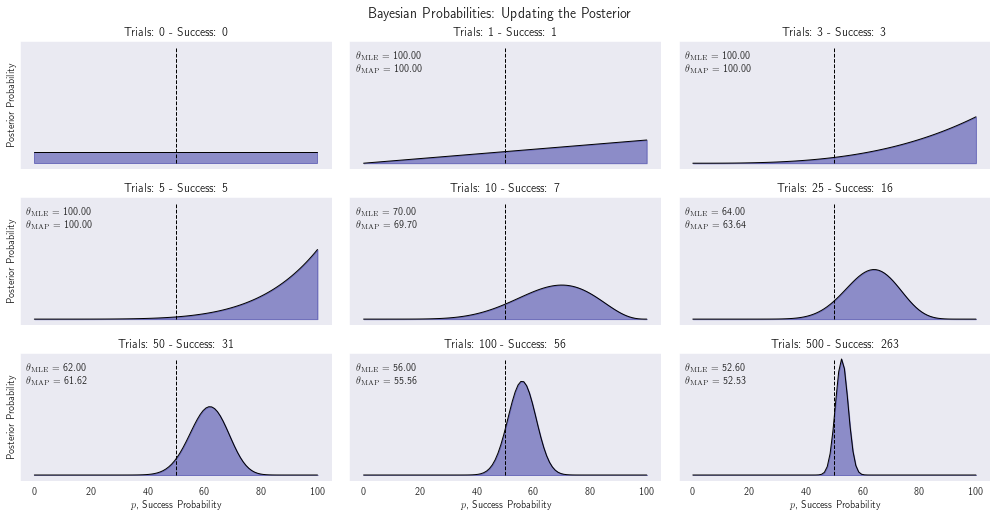

In [154]:
n_trials = [0, 1, 3, 5, 10, 25, 50, 100, 500]
outcomes = stats.bernoulli.rvs(p=0.5, size=n_trials[-1])
p = np.linspace(0, 1, 100)
# uniform (uninformative) prior
a = b = 1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 7), sharex=True)
axes = axes.flatten()
fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
for i, trials in enumerate(n_trials):
    successes = outcomes[:trials]
    theta_mle = np.mean(successes)
    heads = sum(successes)
    tails = trials - heads
    update = stats.beta.pdf(p, a + heads , b + tails)
    theta_map = pd.Series(update, index=p).idxmax()
    axes[i] = format_plot(axes, i, p, update, trials=trials, success=heads, 
                          true_p=.5, tmle=theta_mle, tmap=theta_map)

title = 'Bayesian Probabilities: Updating the Posterior'
fig.suptitle(title,  y=1.02, fontsize=14)
fig.tight_layout()

## Stock Price Moves

In [55]:
sp500_returns = pd.read_hdf('../data/assets.h5', key='sp500/prices').loc['2010':, 'close']
sp500_binary = (sp500_returns.pct_change().dropna() > 0).astype(int)

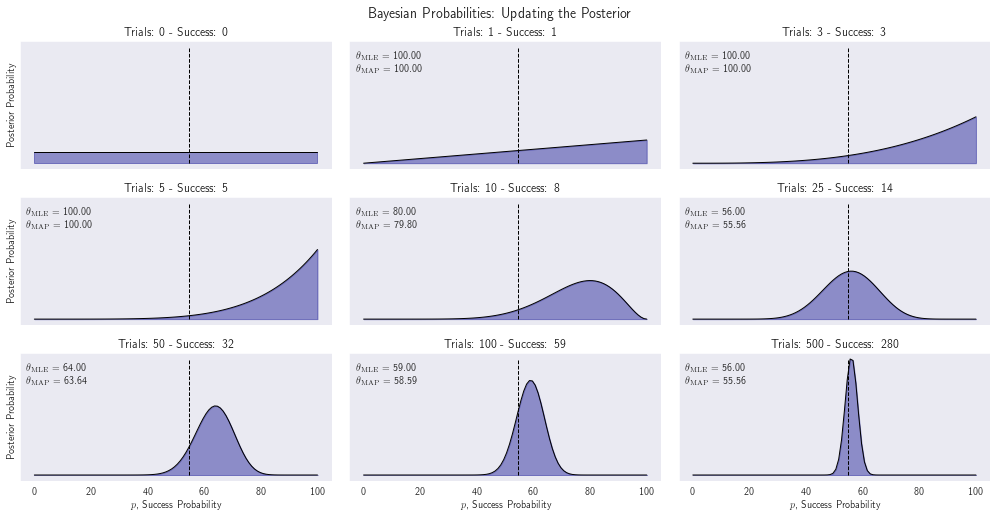

In [153]:
n_days = [0, 1, 3, 5, 10, 25, 50, 100, 500]
# random sample of trading days
# outcomes = sp500_binary.sample(n_days[-1])

# initial 500 trading days
outcomes = sp500_binary.iloc[:n_days[-1]]
p = np.linspace(0, 1, 100)

# uniform (uninformative) prior
a = b = 1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 7), sharex=True)
axes = axes.flatten()
for i, days in enumerate(n_days):
    successes = outcomes.iloc[:days]
    theta_mle = successes.mean()
    up = successes.sum()
    down = days - up
    update = stats.beta.pdf(p, a + up , b + down)
    theta_map = pd.Series(update, index=p).idxmax()
    axes[i] = format_plot(axes, i, p, update, trials=days, success=up, 
                          true_p=sp500_binary.mean(), tmle=theta_mle, tmap=theta_map)

title = 'Bayesian Probabilities: Updating the Posterior'
fig.suptitle(title,  y=1.02, fontsize=14)
fig.tight_layout()
fig.savefig('figures/updating_sp500', dpi=300)